In [2]:
#import neccesary libraries
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#generate random latitude and longitude pairs
lats = np.random.uniform(-90, 90, size = 1600).tolist()
longs = np.random.uniform(-180, 180, size = 1600).tolist()
#zip into coordinate pairs
coords = list(zip(lats, longs))

#find nearest city for each coordinate pair, discarding duplicates
cities = []
countries = []

for x in coords:
    city = citipy.nearest_city(x[0], x[1]).city_name
    country = citipy.nearest_city(x[0], x[1]).country_code
    if city not in cities:
        cities.append(city)
        countries.append(country)
    else:
        #drop coordinate values that return duplicate city entries
        lats.remove(x[0])
        longs.remove(x[1])
    #set cutoff for number of cities
    if len(cities) == 750:
        break
len(cities)

636

In [26]:
#zip into city and country pairs
location = list(zip(cities, countries))
settings = {"units": "imperial",
           "APPID": api_key}
#define lists for data
temps = []
wet = []
clouds = []
wind = []
record = 1
#loop through locations to pull data for each
for x in location:
    target = x[0] + "," + x[1]
    try:
        data = owm.get_current(target, **settings)
        temps.append(data['main']['temp'])
        wet.append(data['main']['humidity'])
        clouds.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        print(f"Check {record}. Data found for city {x[0]}.")
    #set exception for if city is not found in api call
    except:
        temps.append('null')
        wet.append('null')
        clouds.append('null')
        wind.append('null')
        print(f"Check {record}. City {x[0]} not found")
    
    record += 1

       

Check 1. City attawapiskat not found
Check 2. Data found for city progreso.
Check 3. City samusu not found
Check 4. Data found for city luganville.
Check 5. Data found for city felipe carrillo puerto.
Check 6. Data found for city qaanaaq.
Check 7. Data found for city punta arenas.
Check 8. Data found for city victoria point.
Check 9. Data found for city cayenne.
Check 10. City bengkulu not found
Check 11. Data found for city the pas.
Check 12. Data found for city pevek.
Check 13. Data found for city bluff.
Check 14. City sentyabrskiy not found
Check 15. Data found for city chokurdakh.


In [23]:
weather_raw = pd.DataFrame({"City": cities, "Country": countries, "Latitude": lats, "Longitude": longs, 
                        "Temperature": temps, "Humidity": wet, "Cloud Cover": clouds, "Wind Speed": wind})

#drop rows with null values
weather = weather_raw.loc[weather_raw['Humidity'] != 'null']

weather.to_csv("./Output/weatherdat.csv")

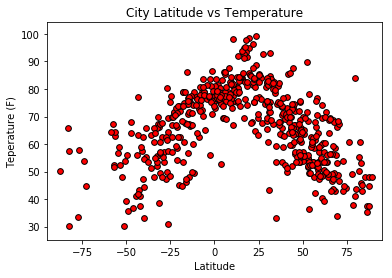

In [19]:
plt.scatter(weather["Latitude"], weather["Temperature"], s=33, facecolors = 'red', edgecolors = 'black')
plt.xlim(-95,95)
plt.ylim(weather['Temperature'].min() - 5, weather['Temperature'].max() + 5)
plt.xlabel("Latitude")
plt.ylabel("Teperature (F)")
plt.title("City Latitude vs Temperature")
plt.savefig("./Output/Temps.png")
plt.show()

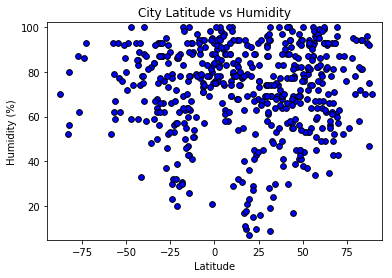

In [20]:
plt.scatter(weather["Latitude"], weather["Humidity"], s=33, facecolors = 'blue', edgecolors = 'black')
plt.xlim(-95,95)
plt.ylim(weather['Humidity'].min() - 2, weather['Humidity'].max() + 2)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("./Output/Humidity.png")
plt.show()

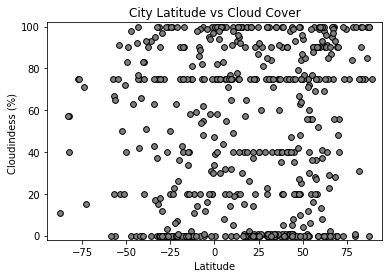

In [21]:
plt.scatter(weather["Latitude"], weather["Cloud Cover"], s=33, facecolors = 'grey', edgecolors = 'black')
plt.xlim(-95,95)
plt.ylim(weather['Cloud Cover'].min() -2, weather['Cloud Cover'].max() + 2)
plt.xlabel("Latitude")
plt.ylabel("Cloudindess (%) ")
plt.title("City Latitude vs Cloud Cover")
plt.savefig("./Output/Clouds.png")
plt.show()

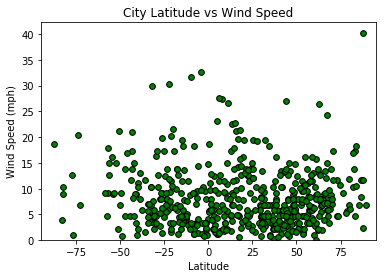

In [22]:
plt.scatter(weather["Latitude"], weather['Wind Speed'], s=33, facecolors = 'green', edgecolors = 'black')
plt.xlim(-95,95)
plt.ylim(weather['Wind Speed'].min(), weather['Wind Speed'].max() + 2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("./Output/Windspeed.png")
plt.show()